In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.figures.figure3 import plot_InhDR_timepoint, transform_DRviability, merge_TRs

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

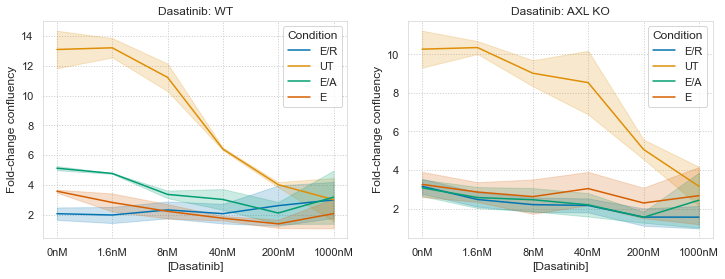

In [3]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_InhDR_timepoint(ax[0], "Dasatinib", itp=18)
ax[0].set_title("Dasatinib: WT")
plot_InhDR_timepoint(ax[1], "Dasatinib", cl="KO", itp=18)
ax[1].set_title("Dasatinib: AXL KO")

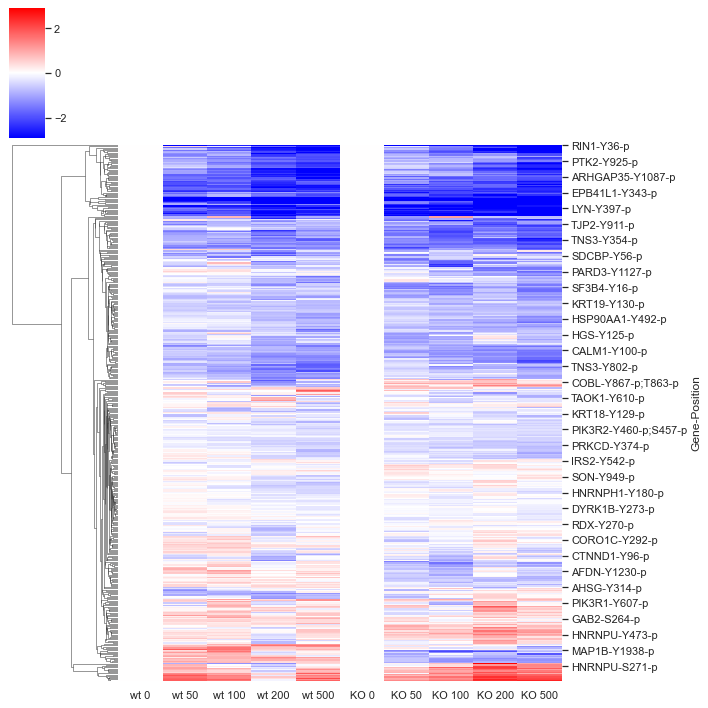

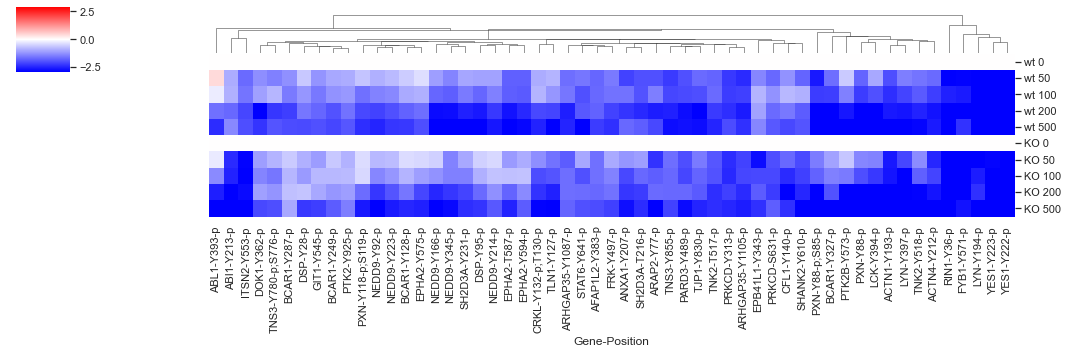

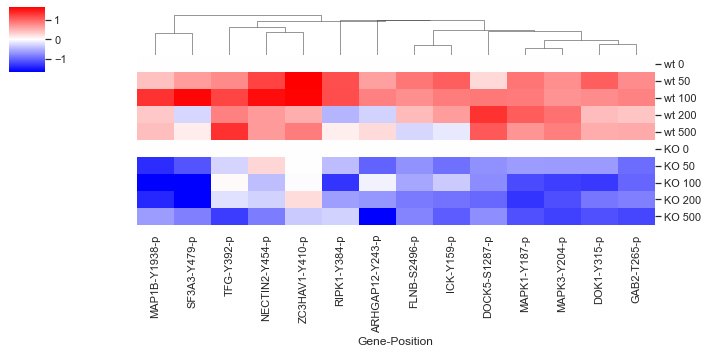

In [4]:
from msresist.pre_processing import preprocessing
from msresist.figures.figure3 import plot_dasatinib_MS_clustermaps

plot_dasatinib_MS_clustermaps(DR=True)

In [65]:
from msresist.pre_processing import preprocessing

das = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=False)
for i in range(das.shape[0]):
    das.iloc[i, 6:11] -= das.iloc[i, 6]
    das.iloc[i, 11:] -= das.iloc[i, 11]

In [6]:
dasMC = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=True)

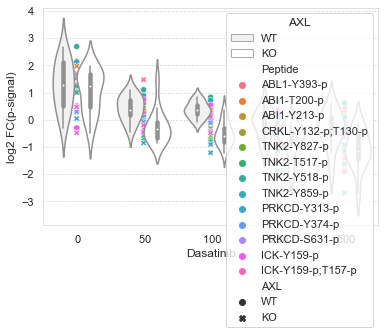

In [17]:
abl = dasMC.set_index("Gene").loc[["ABL1", "ABI1", "CRKL", "TNK2", "PRKCD", "ICK"]].reset_index()
abl.insert(0, "Peptide", [g + "-" + pos for g, pos in list(zip(abl["Gene"], abl["Position"]))])
abl = pd.melt(abl, id_vars="Peptide", var_name="Dasatinib", value_vars=abl.columns[7:], value_name="log2 FC(p-signal)")
abl["AXL"] = [s[:2].upper() for s in abl["Dasatinib"]]
abl["Dasatinib"] = [s[2:].upper() for s in abl["Dasatinib"]]
sns.scatterplot(data=abl, x="Dasatinib", y="log2 FC(p-signal)", hue="Peptide", style="AXL")
sns.violinplot(data=abl, x="Dasatinib", y="log2 FC(p-signal)", alpha=0.1, color="white", hue="AXL")
plt.savefig("kin.svg")

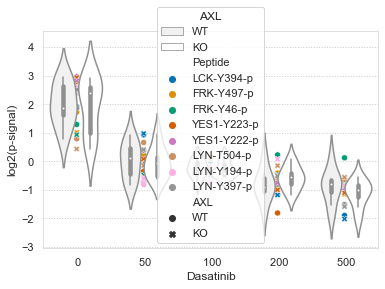

In [19]:
sfk = dasMC.set_index("Gene").loc[["LCK", "FRK", "YES1", "LYN"]].reset_index()
sfk.insert(0, "Peptide", [g + "-" + pos for g, pos in list(zip(sfk["Gene"], sfk["Position"]))])
sfk = pd.melt(sfk, id_vars="Peptide", var_name="Dasatinib", value_vars=sfk.columns[7:], value_name="log2(p-signal)")
sfk["AXL"] = [s[:2].upper() for s in sfk["Dasatinib"]]
sfk["Dasatinib"] = [s[2:].upper() for s in sfk["Dasatinib"]]
sns.scatterplot(data=sfk, x="Dasatinib", y="log2(p-signal)", hue="Peptide", style="AXL")
sns.violinplot(data=sfk, x="Dasatinib", y="log2(p-signal)", alpha=0.1, color="white", hue="AXL")
plt.savefig("src.svg")

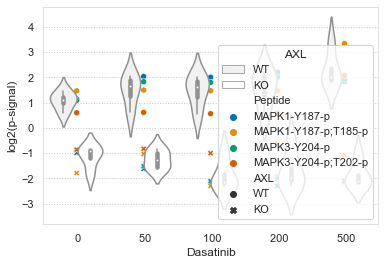

In [138]:
sfk = dasMC.set_index("Gene").loc[["MAPK1", "MAPK3"]].reset_index()
sfk.insert(0, "Peptide", [g + "-" + pos for g, pos in list(zip(sfk["Gene"], sfk["Position"]))])
sfk = pd.melt(sfk, id_vars="Peptide", var_name="Dasatinib", value_vars=sfk.columns[7:], value_name="log2(p-signal)")
sfk["AXL"] = [s[:2].upper() for s in sfk["Dasatinib"]]
sfk["Dasatinib"] = [s[2:].upper() for s in sfk["Dasatinib"]]
sns.scatterplot(data=sfk, x="Dasatinib", y="log2(p-signal)", hue="Peptide", style="AXL")
sns.violinplot(data=sfk, x="Dasatinib", y="log2(p-signal)", alpha=0.1, color="white", hue="AXL")
plt.savefig("erks.svg")

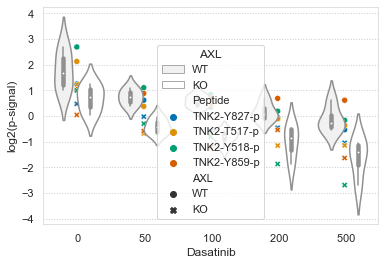

In [137]:
sfk = dasMC.set_index("Gene").loc[["TNK2"]].reset_index()
sfk.insert(0, "Peptide", [g + "-" + pos for g, pos in list(zip(sfk["Gene"], sfk["Position"]))])
sfk = pd.melt(sfk, id_vars="Peptide", var_name="Dasatinib", value_vars=sfk.columns[7:], value_name="log2(p-signal)")
sfk["AXL"] = [s[:2].upper() for s in sfk["Dasatinib"]]
sfk["Dasatinib"] = [s[2:].upper() for s in sfk["Dasatinib"]]
sns.scatterplot(data=sfk, x="Dasatinib", y="log2(p-signal)", hue="Peptide", style="AXL")
sns.violinplot(data=sfk, x="Dasatinib", y="log2(p-signal)", alpha=0.1, color="white", hue="AXL")
plt.savefig("erks.svg")

In [51]:
das[das["Gene"].str.contains("YAP")]

,Protein,Sequence,Gene,Position,BioReps,r2_Std,wt 0,wt 50,wt 100,wt 200,wt 500,KO 0,KO 50,KO 100,KO 200,KO 500


In [21]:
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)

In [23]:
from msresist.clustering import DDMC 

d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)

In [136]:
X[X["Gene"] == "DOCK5"]

,Protein,Sequence,UniprotAcc,Position,BioReps,r2_Std,Gene,PC9 A,KO A,Kd A,KI A,M4 A,M5 A,M7 A,M10 A,M11 A,M15 A,Cluster
